In [0]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np                                          #importing all the required libraries

In [0]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import precision_recall_fscore_support as scr
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [0]:
import matplotlib.pyplot as plt

In [5]:
#getting the data

from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Celestini_3_dataset')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#reading the data from given file

animals=np.genfromtxt('zoo.csv',dtype=None,delimiter=',',skip_header=0,encoding=None)

In [0]:
#creating a dataframe for the given data
df=pd.DataFrame(animals)

In [8]:
#extracting output

y_data=df.iloc[:,[0]]
y=np.array((y_data))
y.shape

(101, 1)

In [0]:
#divinding the data into their respective classes

class1=['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf','cavy', 'cheetah', 'deer', 'dolphin', 'elephant','fruitbat', 'giraffe', 'girl', 'goat', 'gorilla', 'hamster','hare', 'leopard', 'lion', 'lynx', 'mink', 'mole', 'mongoose','opossum', 'oryx', 'platypus', 'polecat', 'pony','porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer','seal', 'sealion', 'squirrel', 'vampire', 'vole', 'wallaby','wolf']

class2=['chicken', 'crow', 'dove', 'duck', 'flamingo', 'gull', 'hawk',
                  'kiwi', 'lark', 'ostrich', 'parakeet', 'penguin', 'pheasant',
                  'rhea', 'skimmer', 'skua', 'sparrow', 'swan', 'vulture', 'wren']

class3=['pitviper', 'seasnake', 'slowworm', 'tortoise', 'tuatara' ]

class4=['bass', 'carp', 'catfish', 'chub', 'dogfish', 'haddock',
                  'herring', 'pike', 'piranha', 'seahorse', 'sole', 'stingray', 'tuna']

class5=['frog', 'frog', 'newt', 'toad' ]

class6=['flea', 'gnat', 'honeybee', 'housefly', 'ladybird', 'moth', 'termite', 'wasp']

class7=['clam', 'crab', 'crayfish', 'lobster', 'octopus',
                  'scorpion', 'seawasp', 'slug', 'starfish', 'worm']


In [0]:
#assigning classes to each data point

list1=[]
for i in range(y.shape[0]):
    item=y[i][0]
    if item in class1:
        val=1
    elif item in class2:
        val=2
    elif item in class3:
        val=3
    elif item in class4:
        val=4
    elif item in class5:
        val=5
    elif item in class6:
        val=6
    elif item in class7:
        val=7
    
    list1.append(val)

In [0]:
#preparing y to be in one-hot encoded form for neural network 

y_one_hot=[]
for i in list1:
  
  z=np.zeros(7)
  z[i-1]=1
  y_one_hot.append(z)
  
   


In [12]:
y_svm=np.array((list1))
y_svm.shape

(101,)

In [0]:
#extracting feature value for each data point 

x_data=df.iloc[:,1:]
x=np.array(x_data)

In [14]:
#splitting the data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_svm,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((75, 17), (26, 17), (75,), (26,))

SVM ALGORITHM

In [15]:
kernel_list=['linear','rbf','poly','sigmoid']
x_train.shape,y_train.shape

((75, 17), (75,))

In [0]:
precision0=np.zeros((4,1))
precision1=np.zeros((4,1))
precision2=np.zeros((4,1))
precision4=np.zeros((4,1))
precision3=np.zeros((4,1))
precision5=np.zeros((4,1))
precision6=np.zeros((4,1))

recall0=np.zeros((4,1))
recall1=np.zeros((4,1))
recall2=np.zeros((4,1))
recall3=np.zeros((4,1))
recall4=np.zeros((4,1))
recall5=np.zeros((4,1))
recall6=np.zeros((4,1))
k=0

In [17]:
for i in kernel_list:
    
    #initial training of classifier
    clf=SVC(kernel=i)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    
    #calculating the score 
    score1=clf.score(x_test,y_test)
    print(i,":",score1)
    
    #5-fold cross validation
    kfold=KFold(n_splits=5)
    clf1=SVC(kernel=i)
    results=cross_val_score(clf1,x_train,y_train,cv=kfold)
    
    
    print("Result of 5 fold cross validation for",i)
    print(i,":",results)
    
    precision,recall,_,_= scr(y_test,y_pred)
    recall0[k]+=recall[0]
    recall1[k]+=recall[1]
    recall2[k]+=recall[2]
    recall3[k]+=recall[3]
    recall4[k]+=recall[4]
    recall5[k]+=recall[5]
    recall6[k]+=recall[6]
    
    precision0[k]+=precision[0]
    precision1[k]+=precision[1]
    precision2[k]+=precision[2]
    precision3[k]+=precision[3]
    precision4[k]+=precision[4]
    precision5[k]+=precision[5]
    precision6[k]+=precision[6]
    k+=1
   

linear : 1.0
Result of 5 fold cross validation for linear
linear : [1.         1.         1.         1.         0.93333333]
rbf : 0.9615384615384616
Result of 5 fold cross validation for rbf
rbf : [0.93333333 1.         0.86666667 0.93333333 0.86666667]
poly : 0.9615384615384616
Result of 5 fold cross validation for poly
poly : [1.         1.         0.93333333 0.93333333 0.86666667]
sigmoid : 0.7307692307692307
Result of 5 fold cross validation for sigmoid
sigmoid : [0.66666667 0.73333333 0.6        0.8        0.8       ]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [0]:
precision_avg=np.zeros((7,1))

for i in range(4):
  precision_avg[0]=precision0.sum()/4
  precision_avg[1]=precision1.sum()/4
  precision_avg[2]=precision2.sum()/4
  precision_avg[3]=precision3.sum()/4
  precision_avg[4]=precision4.sum()/4
  precision_avg[5]=precision5.sum()/4
  precision_avg[6]=precision6.sum()/4

In [19]:
#average of precision for each kernel
precision_avg

array([[1.        ],
       [0.83333333],
       [0.25      ],
       [0.79166667],
       [0.75      ],
       [0.75      ],
       [0.75      ]])

In [0]:
recall_avg=np.zeros((7,1))

for i in range(4):
  recall_avg[0]=recall0.sum()/4
  recall_avg[1]=recall1.sum()/4
  recall_avg[2]=recall2.sum()/4
  recall_avg[3]=recall3.sum()/4
  recall_avg[4]=recall4.sum()/4
  recall_avg[5]=recall5.sum()/4
  recall_avg[6]=recall6.sum()/4
  
 

In [43]:
recall_avg

array([[1.  ],
       [1.  ],
       [0.25],
       [1.  ],
       [0.75],
       [0.75],
       [0.75]])

Therefore,  linear kernel works best for all classes.

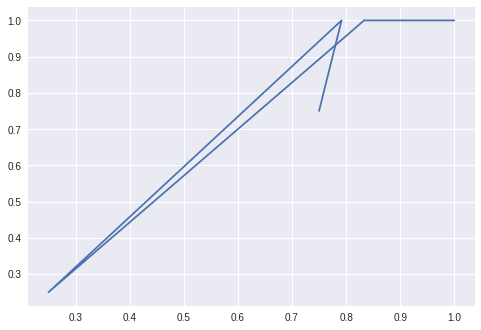

In [44]:
plt.plot(precision_avg,recall_avg)
plt.show()

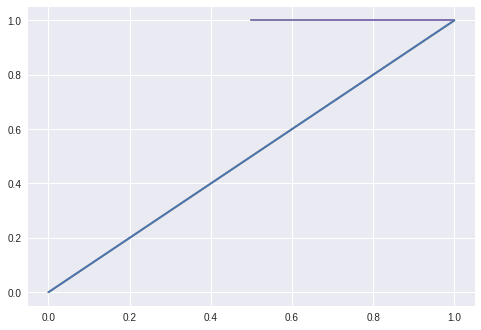

In [41]:
plt.plot(precision0,recall0)
plt.plot(precision1,recall1)
plt.plot(precision2,recall2)
plt.plot(precision3,recall3)
plt.plot(precision4,recall4)
plt.plot(precision5,recall5)
plt.plot(precision6,recall6)
plt.show()

BACK PROPAGATION NEURAL NETWORK

In [21]:
y_nn=np.array((y_one_hot))
y_nn.shape

(101, 7)

In [22]:
#splitting the data into training and testing

x_train,x_test,y_train,y_test=train_test_split(x,y_nn,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((75, 17), (26, 17), (75, 7), (26, 7))

In [0]:
n_input= 17
n_h1=50
n_h2=50
n_output= 7

In [24]:
#assigining random values to the weights and biases

weights={
    'h1': tf.Variable(tf.random_normal([n_input, n_h1])),
    'h2': tf.Variable(tf.random_normal([n_h1, n_h2])),
    'out': tf.Variable(tf.random_normal([n_h2, n_output]))
}

biases={
    'h1': tf.Variable(tf.random_normal([n_h1])),
    'h2': tf.Variable(tf.random_normal([n_h2])),
    'out': tf.Variable(tf.random_normal([n_output]))
}

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#forward propagation

def forward_propagation (x,weights,biases):
  
  #for hidden layer 1
  input_h1= tf.add(tf.matmul(x,weights['h1']),biases['h1'])
  output_h1= tf.nn.relu(input_h1)
  
  #for hidden layer 2
  input_h2= tf.add(tf.matmul(output_h1,weights['h2']),biases['h2'])
  output_h2= tf.nn.relu(input_h2)
  
  #for output layer
  input_out= tf.add(tf.matmul(output_h2,weights['out']),biases['out'])
  output= input_out
  
  return output

In [26]:
#x and y are made place holders so that same function can be used for evaluating all types of data 

x = tf.placeholder("float", shape=[None , n_input])
y = tf.placeholder(tf.int32, shape=[None, n_output])
x, y

(<tf.Tensor 'Placeholder:0' shape=(?, 17) dtype=float32>,
 <tf.Tensor 'Placeholder_1:0' shape=(?, 7) dtype=int32>)

In [0]:
#calculating the predictin values
prediction= forward_propagation(x,weights,biases)

In [28]:
cost= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize_step = optimizer.minimize(cost)

In [0]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [31]:
#optimising the cost multiple times to reduce it

for i in range(50):
  c,_=sess.run([cost,optimize_step],feed_dict={x:x_test,y:y_test})
  if i%5==0:
    print(c)

87.40717
36.05684
11.7845745
0.4439605
0.51609665
0.008410502
0.00013645811
0.0003500171
0.0034561572
0.0003066358


In [32]:
#calculating the class value for the prediction
predictions=tf.argmax(prediction,1)

#enlisting the true output
true_labels=tf.argmax(y,1)

#comparing the results
correct_predictions=tf.equal(predictions,true_labels)


predictions_eval,labels,correct_pred = sess.run([predictions,true_labels,correct_predictions], feed_dict={x:x_test,y:y_test})
predictions_eval,labels,correct_pred



(array([0, 1, 0, 1, 0, 6, 0, 1, 3, 4, 1, 0, 0, 0, 0, 0, 0, 0, 6, 2, 1, 0,
        5, 5, 3, 6]),
 array([0, 1, 0, 1, 0, 6, 0, 1, 3, 4, 1, 0, 0, 0, 0, 0, 0, 0, 6, 2, 1, 0,
        5, 5, 3, 6]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True]))

In [33]:
#finding the accuracy 

accuracy=(correct_pred.sum())/(y_test.shape[0])
accuracy

1.0

COMPARISON OF RESULTS OF SVM AND NEURAL NETWORK

ACCURACY OF SVM(average of all four kernels): 0.913425




ACCURACY OF NEURAL NETWORK : 1.0

```
# This is formatted as code
```



Description:    For the provided dataset, we applied two algorithms namely SVM and Neural Network(Back Propagation). In SVM, we used four different kernels for training as well as 5-fold cross validation and compared the results for each. The results on this dataset shows that the linear kernel works best among all. For neural networks, we first foward propagated the input and then according to the value of error function(cost function) changed the weights for a better model which is together called back propagation. This work is done in repeated manner to finally minimise the cost and yield a well trained model for predictions.The accuracy coming out in this is 1.0